# Simple Linear regression


Predict the percentage of an student based on the no. of study hours.
Data: http://bit.ly/w-data

Find the predicted score if a student studies for 9.25 hrs/ day?

## Importing Libraries

In [1]:
# Importing all the important Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Importing Dataset


In [2]:
# Loading data
df = pd.read_excel('TSFt1.xlsx')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#overview of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visulization


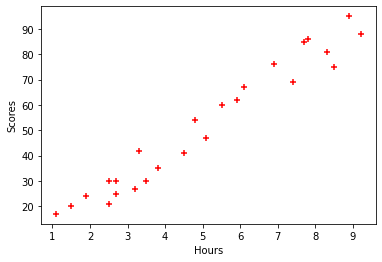

In [5]:
#visulization 
%matplotlib inline
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores,color='red',marker='+')

## Data Preparation


In [6]:
# Dividing the dataset columns. 
# Hours in x and Scores in y
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

## Splitting Dataset


In [7]:
# Split Data into training and testing
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

## Linear Regression Model


In [8]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train)
prediction= reg.predict(x_test)

## Plotting Regression Line


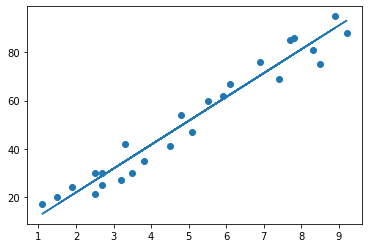

In [9]:
# Regression line
line = reg.coef_*x+reg.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [10]:
new_df = df.drop('Scores',axis='columns')
new_df

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [11]:
Scores = df.Scores
Scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

## Fitting


In [12]:
reg = linear_model.LinearRegression()
reg.fit(new_df,Scores)

LinearRegression()

## Predicting the Score

In [13]:
# predicting score for 9.25 hour study
reg.predict([[9.25]])

array([92.90985477])

## Accurecy

In [14]:
print('test score :')
print(reg.score(x_test, y_test))
print('training score :')
print(reg.score(x_train, y_train))

test score :
0.9491748734859171
training score :
0.9512837351709387


## Prediction

In [15]:
p1 = list(y_test)
p2=list(prediction)
comp = pd.DataFrame({ 'Actual':p1,'Result':p2})
comp

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Model Evaluation Metrics

In [16]:
# efficeincy of model
msqerror = mean_squared_error(y_test, prediction)
mabserrorr = mean_absolute_error(y_test, prediction)
print("Mean Squred Error:",msqerror)
print("Mean absolute Error:",mabserrorr)

Mean Squred Error: 21.5987693072174
Mean absolute Error: 4.183859899002975
